In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime

df_path = "Output/01_Exploration_and_Cleanup/v3_clean_data_created_percentage_changes.xlsx"
df = pd.read_excel(df_path)
df.head(10)
#df.shape


,Date,DCOILBRENTEU,DJIA,DCOILWTICO,DHHNGSP,GOLDAMGBD228NLBM,NASDAQCOM,SP500,WILL5000INDFC,DEXCHUS,...,Pct_DCOILWTICO,Pct_DHHNGSP,Pct_GOLDAMGBD228NLBM,Pct_NASDAQCOM,Pct_SP500,Pct_WILL5000INDFC,Pct_DEXCHUS,Pct_DEXINUS,Pct_DEXJPUS,Pct_DEXUSEU
0,2010-03-18,80.09,10779.17,82.16,4.19,1122.75,2391.28,1165.83,46.55,6.8261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-03-19,78.37,10741.98,80.58,4.01,1121.50,2374.41,1159.90,46.25,6.8265,...,-0.019231,-0.042959,-0.001113,-0.007055,-0.005087,-0.006445,0.000059,-0.003080,0.000442,-0.005366
2,2010-03-22,78.09,10785.89,81.26,4.02,1104.25,2395.40,1165.81,46.55,6.8266,...,0.008439,0.002494,-0.015381,0.008840,0.005095,0.006486,0.000015,0.004635,-0.005304,0.000074
3,2010-03-23,79.17,10888.83,81.68,4.08,1100.75,2415.24,1174.17,46.90,6.8263,...,0.005169,0.014925,-0.003170,0.008283,0.007171,0.007519,-0.000044,-0.000439,0.002444,0.000296
4,2010-03-24,78.03,10836.15,80.29,4.02,1094.00,2398.76,1167.72,46.64,6.8266,...,-0.017018,-0.014706,-0.006132,-0.006823,-0.005493,-0.005544,0.000044,-0.002198,0.018285,-0.013890
5,2010-03-25,78.64,10841.21,80.25,4.01,1093.50,2397.41,1165.73,46.52,6.8270,...,-0.000498,-0.002488,-0.000457,-0.000563,-0.001704,-0.002573,0.000059,0.002203,0.008706,-0.000225
6,2010-03-26,77.98,10850.36,79.75,3.92,1098.00,2395.13,1166.59,46.54,6.8269,...,-0.006231,-0.022444,0.004115,-0.000951,0.000738,0.000430,-0.000015,-0.007473,-0.001403,0.004047
7,2010-03-29,79.89,10895.86,81.92,3.83,1111.25,2404.36,1173.22,46.82,6.8264,...,0.027210,-0.022959,0.012067,0.003854,0.005683,0.006016,-0.000073,-0.004872,0.000972,0.005001
8,2010-03-30,79.46,10907.42,82.14,3.79,1109.75,2410.69,1173.27,46.84,6.8258,...,0.002686,-0.010444,-0.001350,0.002633,0.000043,0.000427,-0.000088,0.002670,0.002590,-0.004159
9,2010-03-31,80.37,10856.63,83.45,3.93,1109.50,2397.96,1169.43,46.67,6.8258,...,0.015948,0.036939,-0.000225,-0.005281,-0.003273,-0.003629,0.000000,-0.002441,0.005490,0.008725


In [134]:
df.shape

(2436, 25)

In [135]:
df.columns

Index(['Date', 'DCOILBRENTEU', 'DJIA', 'DCOILWTICO', 'DHHNGSP',
       'GOLDAMGBD228NLBM', 'NASDAQCOM', 'SP500', 'WILL5000INDFC', 'DEXCHUS',
       'DEXINUS', 'DEXJPUS', 'DEXUSEU', 'Pct_DCOILBRENTEU', 'Pct_DJIA',
       'Pct_DCOILWTICO', 'Pct_DHHNGSP', 'Pct_GOLDAMGBD228NLBM',
       'Pct_NASDAQCOM', 'Pct_SP500', 'Pct_WILL5000INDFC', 'Pct_DEXCHUS',
       'Pct_DEXINUS', 'Pct_DEXJPUS', 'Pct_DEXUSEU'],
      dtype='object')

In [136]:
df.dtypes

Date                     object
DCOILBRENTEU            float64
DJIA                    float64
DCOILWTICO              float64
DHHNGSP                 float64
GOLDAMGBD228NLBM        float64
NASDAQCOM               float64
SP500                   float64
WILL5000INDFC           float64
DEXCHUS                 float64
DEXINUS                 float64
DEXJPUS                 float64
DEXUSEU                 float64
Pct_DCOILBRENTEU        float64
Pct_DJIA                float64
Pct_DCOILWTICO          float64
Pct_DHHNGSP             float64
Pct_GOLDAMGBD228NLBM    float64
Pct_NASDAQCOM           float64
Pct_SP500               float64
Pct_WILL5000INDFC       float64
Pct_DEXCHUS             float64
Pct_DEXINUS             float64
Pct_DEXJPUS             float64
Pct_DEXUSEU             float64
dtype: object

In [137]:
df.describe()

,DCOILBRENTEU,DJIA,DCOILWTICO,DHHNGSP,GOLDAMGBD228NLBM,NASDAQCOM,SP500,WILL5000INDFC,DEXCHUS,DEXINUS,...,Pct_DCOILWTICO,Pct_DHHNGSP,Pct_GOLDAMGBD228NLBM,Pct_NASDAQCOM,Pct_SP500,Pct_WILL5000INDFC,Pct_DEXCHUS,Pct_DEXINUS,Pct_DEXJPUS,Pct_DEXUSEU
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,...,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,79.177783,17946.284860,71.897036,3.241067,1356.465948,4878.058072,2003.397701,89.757635,6.506055,60.556976,...,-0.000144,0.000589,0.000190,0.000556,0.000398,0.000465,0.000013,0.000212,0.000087,-0.000069
std,26.383881,5236.744309,22.154591,0.837332,179.028310,1940.353305,600.649600,31.002341,0.288440,8.562857,...,0.022158,0.043691,0.009717,0.011516,0.010139,0.010340,0.001921,0.004984,0.005871,0.005558
min,26.010000,9686.480000,26.190000,1.490000,1050.600000,2091.790000,1022.580000,41.150000,6.040200,43.900000,...,-0.245260,-0.378495,-0.085271,-0.094347,-0.095113,-0.097228,-0.012340,-0.036863,-0.034372,-0.026370
25%,56.167500,13167.747500,51.822500,2.700000,1230.537500,3040.517500,1409.677500,59.102500,6.236225,54.295000,...,-0.011378,-0.015608,-0.005154,-0.004195,-0.003371,-0.003614,-0.000677,-0.002240,-0.002860,-0.003154
50%,74.290000,17193.395000,68.790000,3.045000,1299.500000,4705.055000,2011.315000,88.905000,6.472650,63.250000,...,0.000491,0.000000,0.000266,0.000951,0.000603,0.000788,0.000000,0.000000,0.000090,-0.000073
75%,107.917500,22050.867500,93.542500,3.850000,1473.162500,6401.105000,2476.620000,113.972500,6.772000,66.950000,...,0.010890,0.015019,0.005440,0.006582,0.005161,0.005401,0.000654,0.002510,0.003176,0.002989
max,128.140000,29551.420000,112.380000,8.150000,1891.000000,9817.180000,3386.150000,160.950000,7.178600,74.330000,...,0.152301,0.691057,0.052013,0.093459,0.092871,0.089978,0.018327,0.047770,0.033993,0.031117


In [138]:
df.count()

Date                    2436
DCOILBRENTEU            2436
DJIA                    2436
DCOILWTICO              2436
DHHNGSP                 2436
GOLDAMGBD228NLBM        2436
NASDAQCOM               2436
SP500                   2436
WILL5000INDFC           2436
DEXCHUS                 2436
DEXINUS                 2436
DEXJPUS                 2436
DEXUSEU                 2436
Pct_DCOILBRENTEU        2435
Pct_DJIA                2435
Pct_DCOILWTICO          2435
Pct_DHHNGSP             2435
Pct_GOLDAMGBD228NLBM    2435
Pct_NASDAQCOM           2435
Pct_SP500               2435
Pct_WILL5000INDFC       2435
Pct_DEXCHUS             2435
Pct_DEXINUS             2435
Pct_DEXJPUS             2435
Pct_DEXUSEU             2435
dtype: int64

In [139]:
#Define the scatter plot
def cccscatter(x_axis,y_axis,a,b,c):
    x_values = x_axis
    y_values = y_axis
    
    
    line_position_x = x_values.min()
    line_position_y = (y_values.max())*0.99
    r_position_x = x_values.min()
    r_position_y = y_values.max()*0.96
    r_squared_position_x = x_values.min()
    r_squared_position_y = y_values.max()*0.93
    
    
    plt.scatter(x_values,y_values)
    plt.title(a)
    plt.xlabel(b)
    plt.ylabel(c)    
    #Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    # y = mx + b
    regress_values = x_values * slope + intercept
    #print(regress_values)
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    
    r_value_eq = "R = " + str(round(rvalue,2))
    r_squared = rvalue * rvalue
    r_squared_value_eq = "R Sqd = " + str(round(r_squared,2))
    
    
    print(line_eq)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(line_position_x,line_position_y),fontsize=12,color="red")
    plt.annotate(r_value_eq, (r_position_x,r_position_y),fontsize=12,color="black")
    plt.annotate(r_squared_value_eq, (r_squared_position_x,r_squared_position_y),fontsize=12,color="brown")
    # Print r square value
    print(f"The r (Correlation) is: {round(rvalue,2)}")
    # Show plot
    plt.savefig("Output/02_Analysis/" + a +".png")
    plt.show()



In [140]:
#==================================================
# FIRST ANALYSIS 
# BRENT CRUDE OIL VS DOW JONES INDUSTRIAL AVERAGE
#==================================================


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +-41.06
The r (Correlation) is: 0.93


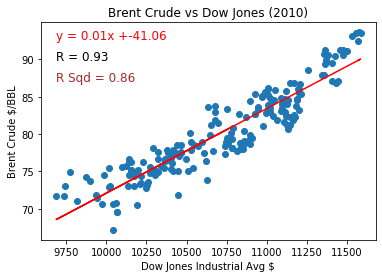

In [141]:
# Limit data frame by what we want to plot
df_01_2010_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2010_prep['Date']=pd.to_datetime(df_01_2010_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2011-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2010_final = df_01_2010_prep[(df_01_2010_prep['Date']>=date1) & (df_01_2010_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2010_final["DJIA"]
brent_df = df_01_2010_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2010)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +48.22
The r (Correlation) is: 0.37


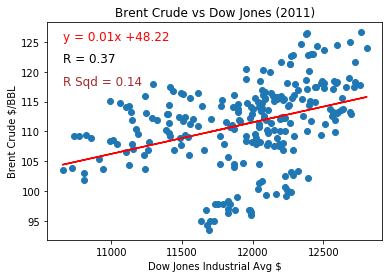

In [142]:
# Limit data frame by what we want to plot
df_01_2011_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2011_prep['Date']=pd.to_datetime(df_01_2011_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2011-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2012-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2011_final = df_01_2011_prep[(df_01_2011_prep['Date']>=date1) & (df_01_2011_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2011_final["DJIA"]
brent_df = df_01_2011_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2011)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +-20.84
The r (Correlation) is: 0.39


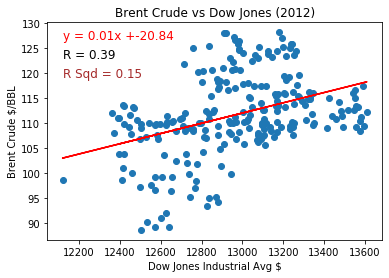

In [143]:
# Limit data frame by what we want to plot
df_01_2012_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2012_prep['Date']=pd.to_datetime(df_01_2012_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2012-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2013-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2012_final = df_01_2012_prep[(df_01_2012_prep['Date']>=date1) & (df_01_2012_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2012_final["DJIA"]
brent_df = df_01_2012_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2012)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +132.28
The r (Correlation) is: -0.24


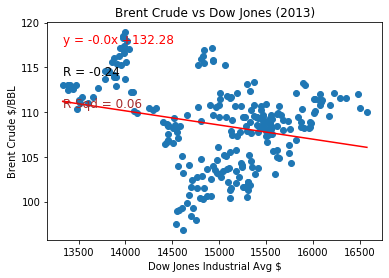

In [144]:

# Limit data frame by what we want to plot
df_01_2013_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2013_prep['Date']=pd.to_datetime(df_01_2013_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2013-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2014-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2013_final = df_01_2013_prep[(df_01_2013_prep['Date']>=date1) & (df_01_2013_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2013_final["DJIA"]
brent_df = df_01_2013_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2013)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.02x +426.99
The r (Correlation) is: -0.73


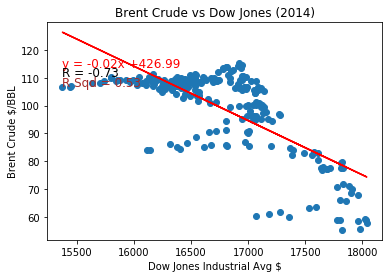

In [145]:

# Limit data frame by what we want to plot
df_01_2014_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2014_prep['Date']=pd.to_datetime(df_01_2014_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2014-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2015-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2014_final = df_01_2014_prep[(df_01_2014_prep['Date']>=date1) & (df_01_2014_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2014_final["DJIA"]
brent_df = df_01_2014_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2014)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +-85.83
The r (Correlation) is: 0.55


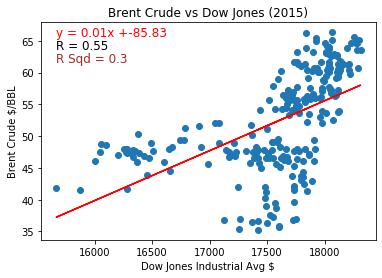

In [146]:

# Limit data frame by what we want to plot
df_01_2015_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2015_prep['Date']=pd.to_datetime(df_01_2015_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2015-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2016-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2015_final = df_01_2015_prep[(df_01_2015_prep['Date']>=date1) & (df_01_2015_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2015_final["DJIA"]
brent_df = df_01_2015_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2015)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +-63.54
The r (Correlation) is: 0.84


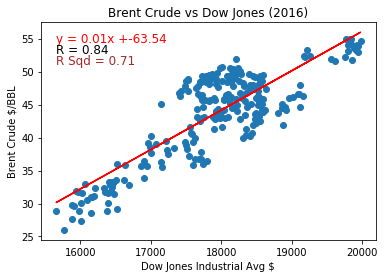

In [147]:

# Limit data frame by what we want to plot
df_01_2016_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2016_prep['Date']=pd.to_datetime(df_01_2016_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2016-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2017-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2016_final = df_01_2016_prep[(df_01_2016_prep['Date']>=date1) & (df_01_2016_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2016_final["DJIA"]
brent_df = df_01_2016_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2016)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +-7.8
The r (Correlation) is: 0.7


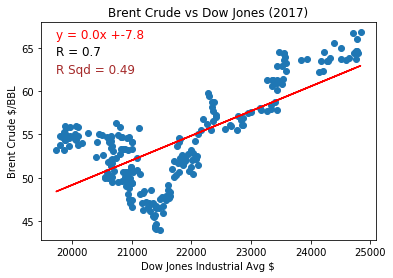

In [148]:

# Limit data frame by what we want to plot
df_01_2017_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2017_prep['Date']=pd.to_datetime(df_01_2017_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2017-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2018-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2017_final = df_01_2017_prep[(df_01_2017_prep['Date']>=date1) & (df_01_2017_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2017_final["DJIA"]
brent_df = df_01_2017_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2017)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +-26.74
The r (Correlation) is: 0.45


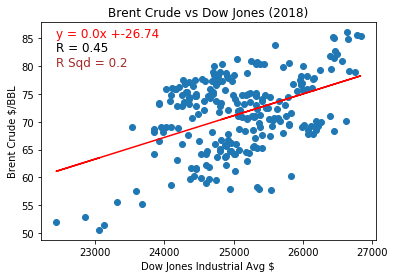

In [149]:

# Limit data frame by what we want to plot
df_01_2018_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2018_prep['Date']=pd.to_datetime(df_01_2018_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2018-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2018_final = df_01_2018_prep[(df_01_2018_prep['Date']>=date1) & (df_01_2018_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2018_final["DJIA"]
brent_df = df_01_2018_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2018)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +40.63
The r (Correlation) is: 0.22


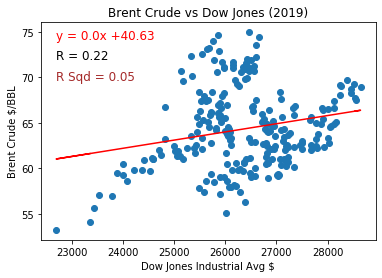

In [150]:

# Limit data frame by what we want to plot
df_01_2019_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2019_prep['Date']=pd.to_datetime(df_01_2019_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2019-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2020-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2019_final = df_01_2019_prep[(df_01_2019_prep['Date']>=date1) & (df_01_2019_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2019_final["DJIA"]
brent_df = df_01_2019_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2019)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +-57.16
The r (Correlation) is: 0.84


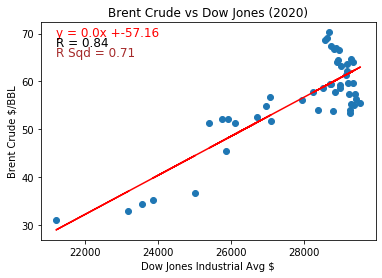

In [151]:
# Limit data frame by what we want to plot
df_01_2020_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2020_prep['Date']=pd.to_datetime(df_01_2020_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2020-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2020_final = df_01_2020_prep[(df_01_2020_prep['Date']>=date1) & (df_01_2020_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2020_final["DJIA"]
brent_df = df_01_2020_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones (2020)","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +129.06
The r (Correlation) is: -0.55


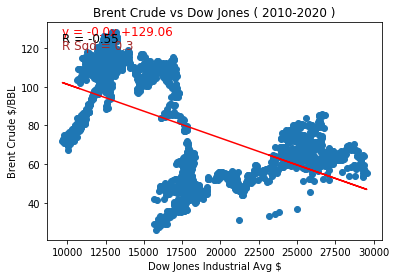

In [152]:
# Limit data frame by what we want to plot
df_01_ALL_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_ALL_prep['Date']=pd.to_datetime(df_01_ALL_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_ALL_final = df_01_ALL_prep[(df_01_ALL_prep['Date']>=date1) & (df_01_ALL_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_ALL_final["DJIA"]
brent_df = df_01_ALL_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Brent Crude vs Dow Jones ( 2010-2020 )","Dow Jones Industrial Avg $","Brent Crude $/BBL")


In [153]:
#========================================
# MOVING TO THE NEXT ANALYSIS
# GOLD vs DOW JONES INDUSTRIAL AVERAGE
# =======================================

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.1x +215.14
The r (Correlation) is: 0.52


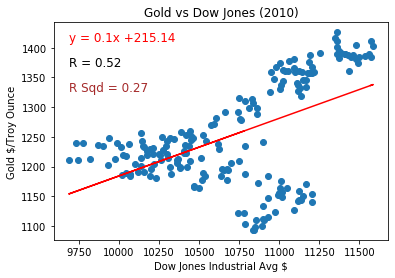

In [154]:
# Limit data frame by what we want to plot
df_02_2010_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2010_prep['Date']=pd.to_datetime(df_02_2010_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2011-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2010_final = df_02_2010_prep[(df_02_2010_prep['Date']>=date1) & (df_02_2010_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2010_final["DJIA"]
gold_df = df_02_2010_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2010)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")

            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.16x +3536.1
The r (Correlation) is: -0.54


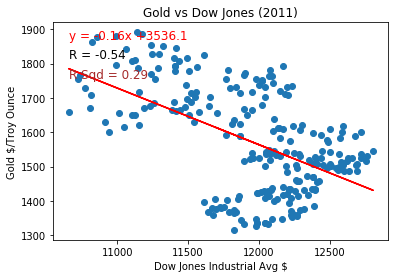

In [155]:
# Limit data frame by what we want to plot
df_02_2011_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2011_prep['Date']=pd.to_datetime(df_02_2011_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2011-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2012-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2011_final = df_02_2011_prep[(df_02_2011_prep['Date']>=date1) & (df_02_2011_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2011_final["DJIA"]
gold_df = df_02_2011_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2011)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")



C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.12x +140.02
The r (Correlation) is: 0.57


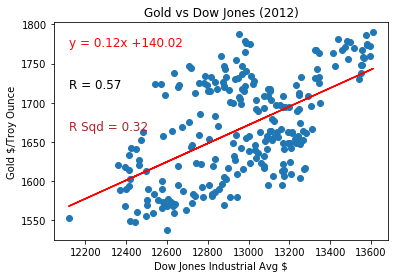

In [156]:
# Limit data frame by what we want to plot
df_02_2012_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2012_prep['Date']=pd.to_datetime(df_02_2012_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2012-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2013-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2012_final = df_02_2012_prep[(df_02_2012_prep['Date']>=date1) & (df_02_2012_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2012_final["DJIA"]
gold_df = df_02_2012_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2012)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")



C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.19x +4196.85
The r (Correlation) is: -0.9


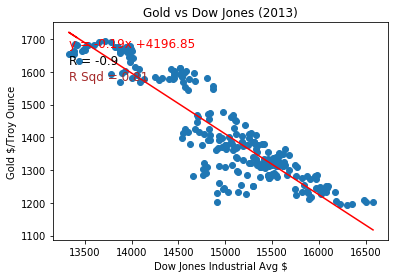

In [157]:
# Limit data frame by what we want to plot
df_02_2013_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2013_prep['Date']=pd.to_datetime(df_02_2013_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2013-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2014-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2013_final = df_02_2013_prep[(df_02_2013_prep['Date']>=date1) & (df_02_2013_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2013_final["DJIA"]
gold_df = df_02_2013_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2013)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")



C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.05x +2171.53
The r (Correlation) is: -0.59


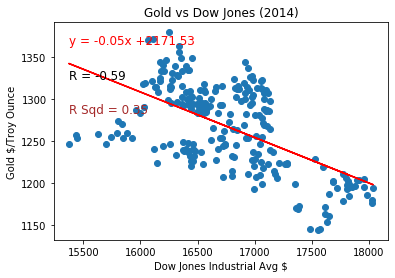

In [158]:
# Limit data frame by what we want to plot
df_02_2014_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2014_prep['Date']=pd.to_datetime(df_02_2014_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2014-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2015-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2014_final = df_02_2014_prep[(df_02_2014_prep['Date']>=date1) & (df_02_2014_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2014_final["DJIA"]
gold_df = df_02_2014_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2014)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.03x +598.74
The r (Correlation) is: 0.31


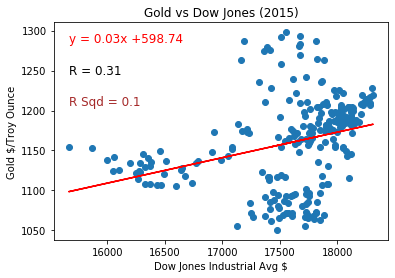

In [159]:
# Limit data frame by what we want to plot
df_02_2015_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2015_prep['Date']=pd.to_datetime(df_02_2015_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2015-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2016-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2015_final = df_02_2015_prep[(df_02_2015_prep['Date']>=date1) & (df_02_2015_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2015_final["DJIA"]
gold_df = df_02_2015_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2015)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.02x +854.67
The r (Correlation) is: 0.28


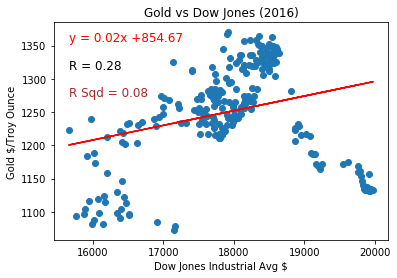

In [160]:
# Limit data frame by what we want to plot
df_02_2016_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2016_prep['Date']=pd.to_datetime(df_02_2016_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2016-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2017-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2016_final = df_02_2016_prep[(df_02_2016_prep['Date']>=date1) & (df_02_2016_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2016_final["DJIA"]
gold_df = df_02_2016_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2016)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +945.42
The r (Correlation) is: 0.55


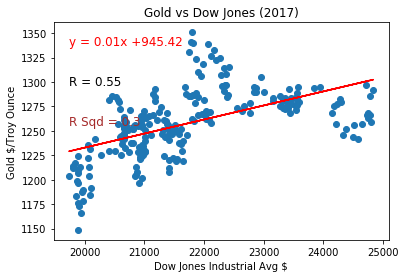

In [161]:
# Limit data frame by what we want to plot
df_02_2017_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2017_prep['Date']=pd.to_datetime(df_02_2017_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2017-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2018-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2017_final = df_02_2017_prep[(df_02_2017_prep['Date']>=date1) & (df_02_2017_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2017_final["DJIA"]
gold_df = df_02_2017_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2017)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.03x +1945.44
The r (Correlation) is: -0.39


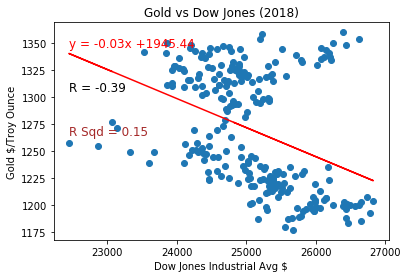

In [162]:
# Limit data frame by what we want to plot
df_02_2018_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2018_prep['Date']=pd.to_datetime(df_02_2018_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2018-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2018_final = df_02_2018_prep[(df_02_2018_prep['Date']>=date1) & (df_02_2018_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2018_final["DJIA"]
gold_df = df_02_2018_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2018)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.06x +-76.23
The r (Correlation) is: 0.65


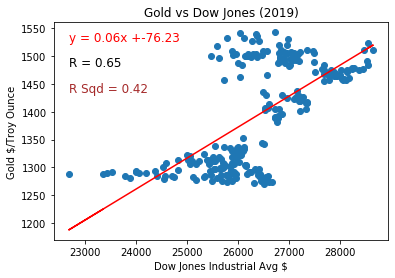

In [163]:
# Limit data frame by what we want to plot
df_02_2019_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2019_prep['Date']=pd.to_datetime(df_02_2019_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2019-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2020-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2019_final = df_02_2019_prep[(df_02_2019_prep['Date']>=date1) & (df_02_2019_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2019_final["DJIA"]
gold_df = df_02_2019_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2019)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.01x +2001.25
The r (Correlation) is: -0.67


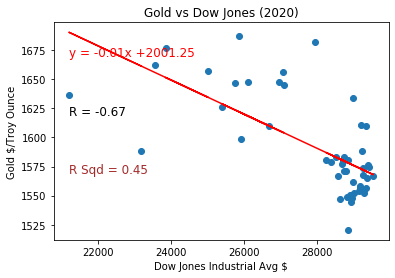

In [164]:
# Limit data frame by what we want to plot
df_02_2020_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2020_prep['Date']=pd.to_datetime(df_02_2020_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2020-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2020_final = df_02_2020_prep[(df_02_2020_prep['Date']>=date1) & (df_02_2020_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2020_final["DJIA"]
gold_df = df_02_2020_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones (2020)","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.01x +1517.58
The r (Correlation) is: -0.26


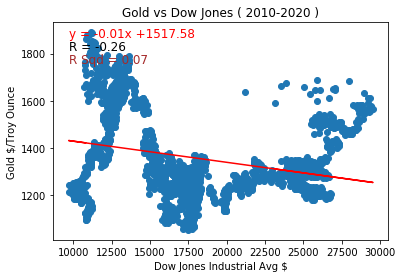

In [165]:
# Limit data frame by what we want to plot
df_02_ALL_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_ALL_prep['Date']=pd.to_datetime(df_02_ALL_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_ALL_final = df_02_ALL_prep[(df_02_ALL_prep['Date']>=date1) & (df_02_ALL_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_ALL_final["DJIA"]
gold_df = df_02_ALL_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Gold vs Dow Jones ( 2010-2020 )","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


In [166]:
#=========================================================================
# MOVING TO THE NEXT ANALYSIS
# CHINESE YUAN / US DOLLAR EXCHANGE RATE vs DOW JONES INDUSTRIAL AVERAGE
# ========================================================================

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +7.81
The r (Correlation) is: -0.64


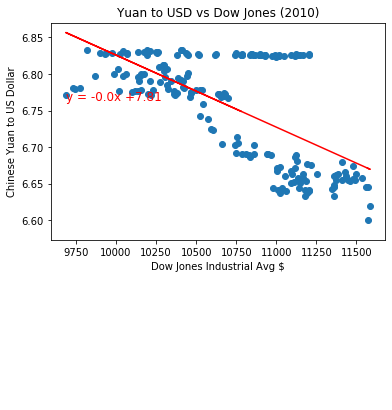

In [167]:
# Limit data frame by what we want to plot
df_03_2010_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2010_prep['Date']=pd.to_datetime(df_03_2010_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2011-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2010_final = df_03_2010_prep[(df_03_2010_prep['Date']>=date1) & (df_03_2010_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2010_final["DJIA"]
chyusd_df = df_03_2010_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2010)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")
            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +5.6
The r (Correlation) is: 0.41


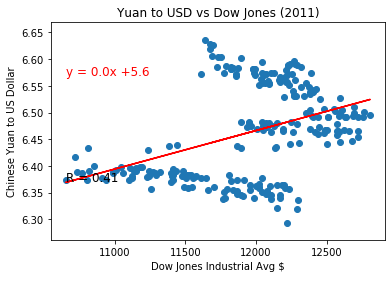

In [168]:
# Limit data frame by what we want to plot
df_03_2011_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2011_prep['Date']=pd.to_datetime(df_03_2011_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2011-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2012-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2011_final = df_03_2011_prep[(df_03_2011_prep['Date']>=date1) & (df_03_2011_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2011_final["DJIA"]
chyusd_df = df_03_2011_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2011)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +6.87
The r (Correlation) is: -0.3


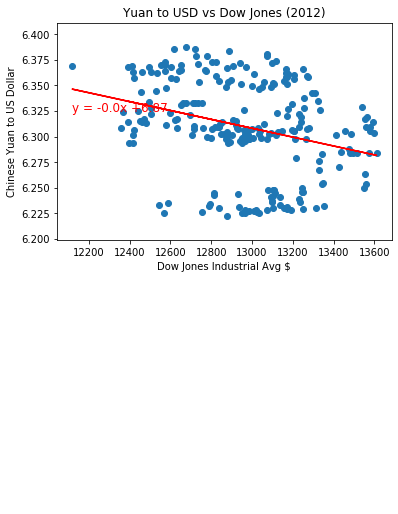

In [169]:
# Limit data frame by what we want to plot
df_03_2012_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2012_prep['Date']=pd.to_datetime(df_03_2012_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2012-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2013-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2012_final = df_03_2012_prep[(df_03_2012_prep['Date']>=date1) & (df_03_2012_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2012_final["DJIA"]
chyusd_df = df_03_2012_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2012)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +7.13
The r (Correlation) is: -0.92


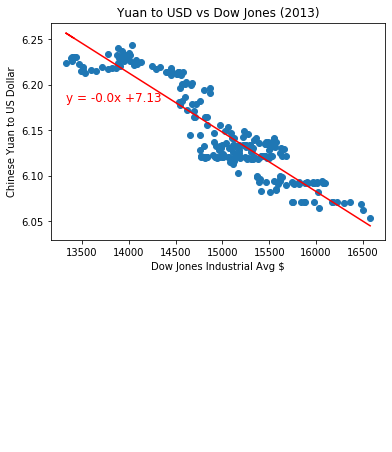

In [170]:
# Limit data frame by what we want to plot
df_03_2013_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2013_prep['Date']=pd.to_datetime(df_03_2013_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2013-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2014-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2013_final = df_03_2013_prep[(df_03_2013_prep['Date']>=date1) & (df_03_2013_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2013_final["DJIA"]
chyusd_df = df_03_2013_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2013)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +5.75
The r (Correlation) is: 0.23


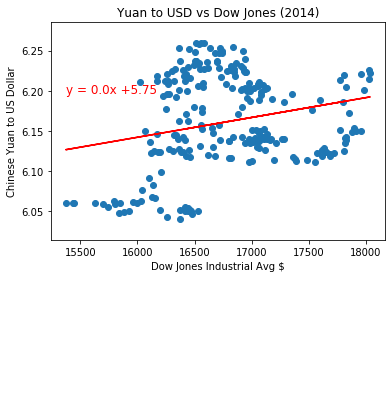

In [171]:
# Limit data frame by what we want to plot
df_03_2014_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2014_prep['Date']=pd.to_datetime(df_03_2014_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2014-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2015-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2014_final = df_03_2014_prep[(df_03_2014_prep['Date']>=date1) & (df_03_2014_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2014_final["DJIA"]
chyusd_df = df_03_2014_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2014)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +7.86
The r (Correlation) is: -0.57


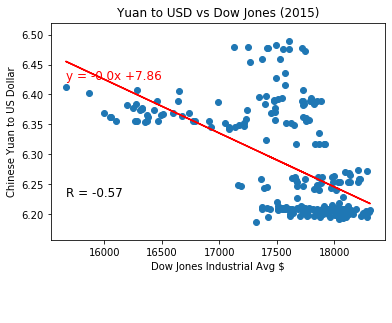

In [172]:
# Limit data frame by what we want to plot
df_03_2015_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2015_prep['Date']=pd.to_datetime(df_03_2015_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2015-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2016-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2015_final = df_03_2015_prep[(df_03_2015_prep['Date']>=date1) & (df_03_2015_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2015_final["DJIA"]
chyusd_df = df_03_2015_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2015)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +4.82
The r (Correlation) is: 0.72


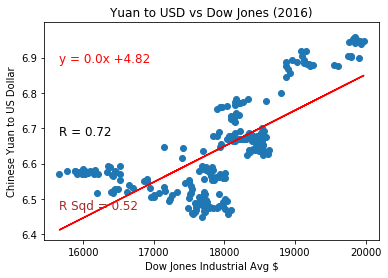

In [173]:
# Limit data frame by what we want to plot
df_03_2016_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2016_prep['Date']=pd.to_datetime(df_03_2016_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2016-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2017-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2016_final = df_03_2016_prep[(df_03_2016_prep['Date']>=date1) & (df_03_2016_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2016_final["DJIA"]
chyusd_df = df_03_2016_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2016)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +8.55
The r (Correlation) is: -0.84


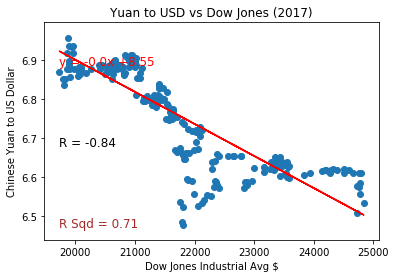

In [174]:
# Limit data frame by what we want to plot
df_03_2017_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2017_prep['Date']=pd.to_datetime(df_03_2017_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2017-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2018-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2017_final = df_03_2017_prep[(df_03_2017_prep['Date']>=date1) & (df_03_2017_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2017_final["DJIA"]
chyusd_df = df_03_2017_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2017)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +3.98
The r (Correlation) is: 0.32


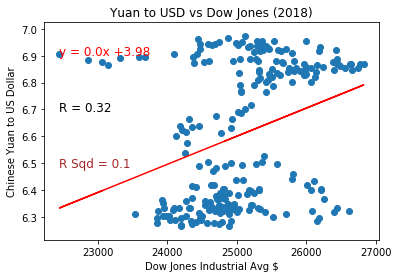

In [175]:
# Limit data frame by what we want to plot
df_03_2018_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2018_prep['Date']=pd.to_datetime(df_03_2018_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2018-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2018_final = df_03_2018_prep[(df_03_2018_prep['Date']>=date1) & (df_03_2018_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2018_final["DJIA"]
chyusd_df = df_03_2018_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2018)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +5.17
The r (Correlation) is: 0.48


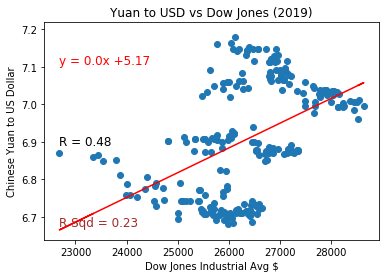

In [176]:
# Limit data frame by what we want to plot
df_03_2019_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2019_prep['Date']=pd.to_datetime(df_03_2019_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2019-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2020-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2019_final = df_03_2019_prep[(df_03_2019_prep['Date']>=date1) & (df_03_2019_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2019_final["DJIA"]
chyusd_df = df_03_2019_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2019)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +7.14
The r (Correlation) is: -0.29


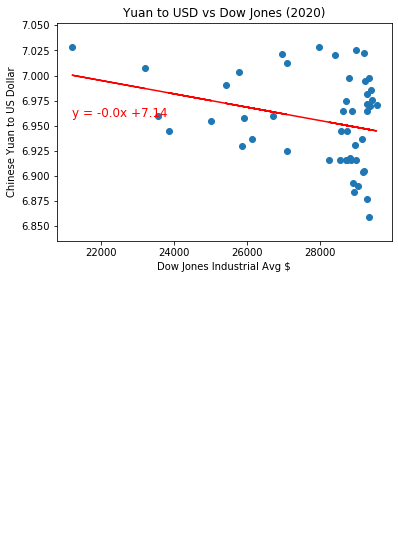

In [177]:
# Limit data frame by what we want to plot
df_03_2020_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2020_prep['Date']=pd.to_datetime(df_03_2020_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2020-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2020_final = df_03_2020_prep[(df_03_2020_prep['Date']>=date1) & (df_03_2020_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2020_final["DJIA"]
chyusd_df = df_03_2020_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones (2020)","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +6.03
The r (Correlation) is: 0.48


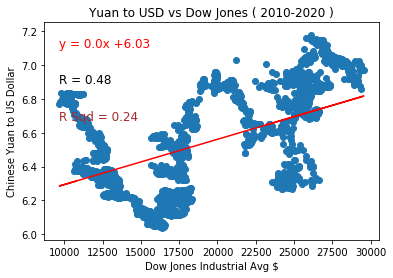

In [178]:
# Limit data frame by what we want to plot
df_03_ALL_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_ALL_prep['Date']=pd.to_datetime(df_03_ALL_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_ALL_final = df_03_ALL_prep[(df_03_ALL_prep['Date']>=date1) & (df_03_ALL_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_ALL_final["DJIA"]
chyusd_df = df_03_ALL_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Dow Jones ( 2010-2020 )","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


In [179]:
#=========================================================================
# MOVING TO THE NEXT ANALYSIS
# CHINESE YUAN / US DOLLAR EXCHANGE RATE vs GOLD
# ========================================================================

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +7.69
The r (Correlation) is: -0.91


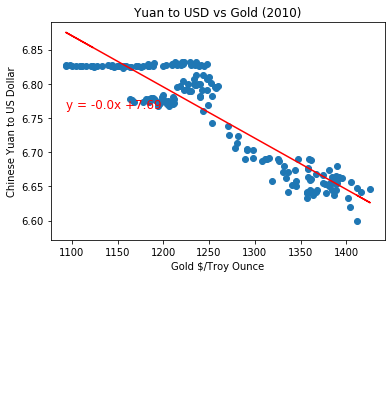

In [180]:
# Limit data frame by what we want to plot
df_04_2010_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2010_prep['Date']=pd.to_datetime(df_04_2010_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2011-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2010_final = df_04_2010_prep[(df_04_2010_prep['Date']>=date1) & (df_04_2010_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2010_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2010_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2010)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")
            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +7.27
The r (Correlation) is: -0.89


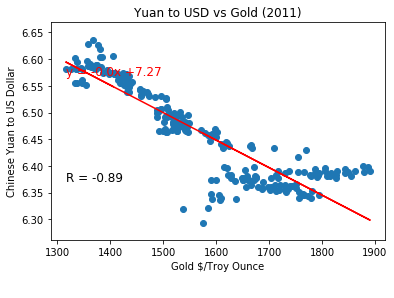

In [181]:
# Limit data frame by what we want to plot
df_04_2011_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2011_prep['Date']=pd.to_datetime(df_04_2011_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2011-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2012-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2011_final = df_04_2011_prep[(df_04_2011_prep['Date']>=date1) & (df_04_2011_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2011_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2011_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2011)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")
            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +7.04
The r (Correlation) is: -0.62


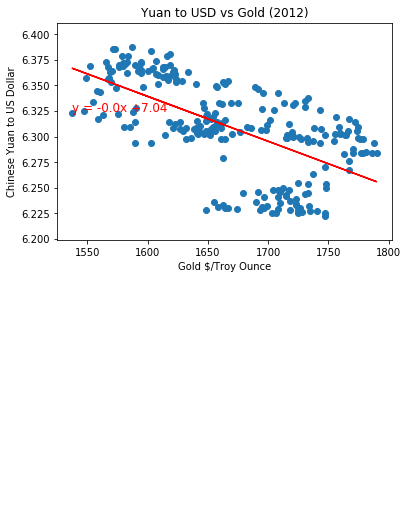

In [182]:
# Limit data frame by what we want to plot
df_04_2012_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2012_prep['Date']=pd.to_datetime(df_04_2012_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2012-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2013-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2012_final = df_04_2012_prep[(df_04_2012_prep['Date']>=date1) & (df_04_2012_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2012_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2012_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2012)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")
            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +5.7
The r (Correlation) is: 0.93


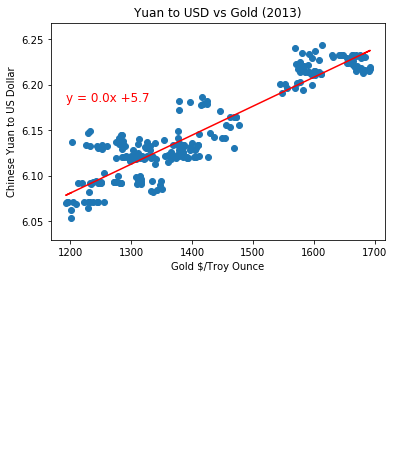

In [183]:
# Limit data frame by what we want to plot
df_04_2013_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2013_prep['Date']=pd.to_datetime(df_04_2013_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2013-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2014-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2013_final = df_04_2013_prep[(df_04_2013_prep['Date']>=date1) & (df_04_2013_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2013_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2013_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2013)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")
            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +5.72
The r (Correlation) is: 0.29


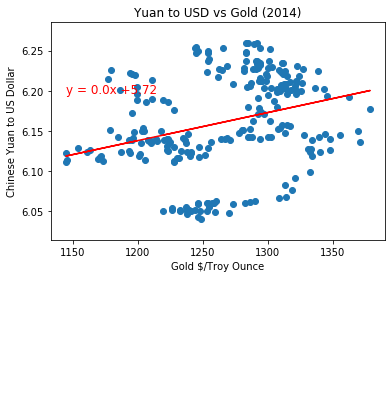

In [184]:
# Limit data frame by what we want to plot
df_04_2014_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2014_prep['Date']=pd.to_datetime(df_04_2014_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2014-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2015-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2014_final = df_04_2014_prep[(df_04_2014_prep['Date']>=date1) & (df_04_2014_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2014_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2014_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2014)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +7.45
The r (Correlation) is: -0.66


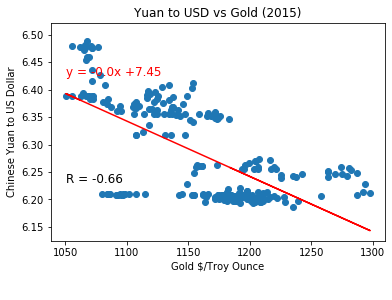

In [185]:
# Limit data frame by what we want to plot
df_04_2015_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2015_prep['Date']=pd.to_datetime(df_04_2015_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2015-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2016-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2015_final = df_04_2015_prep[(df_04_2015_prep['Date']>=date1) & (df_04_2015_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2015_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2015_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2015)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +6.83
The r (Correlation) is: -0.08


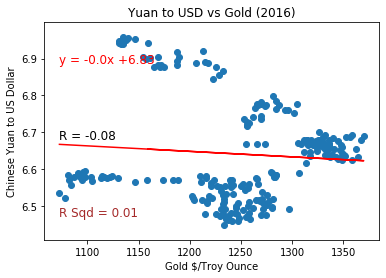

In [186]:
# Limit data frame by what we want to plot
df_04_2016_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2016_prep['Date']=pd.to_datetime(df_04_2016_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2016-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2017-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2016_final = df_04_2016_prep[(df_04_2016_prep['Date']>=date1) & (df_04_2016_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2016_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2016_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2016)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +10.33
The r (Correlation) is: -0.76


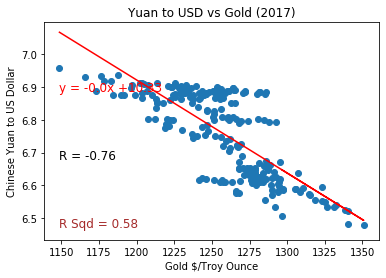

In [187]:
# Limit data frame by what we want to plot
df_04_2017_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2017_prep['Date']=pd.to_datetime(df_04_2017_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2017-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2018-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2017_final = df_04_2017_prep[(df_04_2017_prep['Date']>=date1) & (df_04_2017_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2017_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2017_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2017)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +12.25
The r (Correlation) is: -0.93


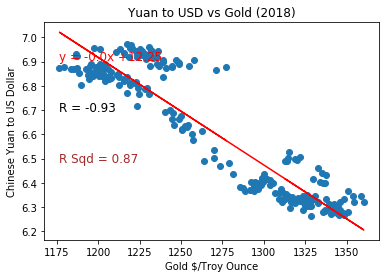

In [188]:
# Limit data frame by what we want to plot
df_04_2018_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2018_prep['Date']=pd.to_datetime(df_04_2018_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2018-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2018_final = df_04_2018_prep[(df_04_2018_prep['Date']>=date1) & (df_04_2018_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2018_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2018_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2018)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +4.91
The r (Correlation) is: 0.89


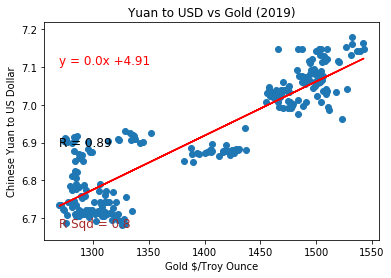

In [189]:
# Limit data frame by what we want to plot
df_04_2019_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2019_prep['Date']=pd.to_datetime(df_04_2019_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2019-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2020-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2019_final = df_04_2019_prep[(df_04_2019_prep['Date']>=date1) & (df_04_2019_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2019_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2019_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2019)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +6.22
The r (Correlation) is: 0.44


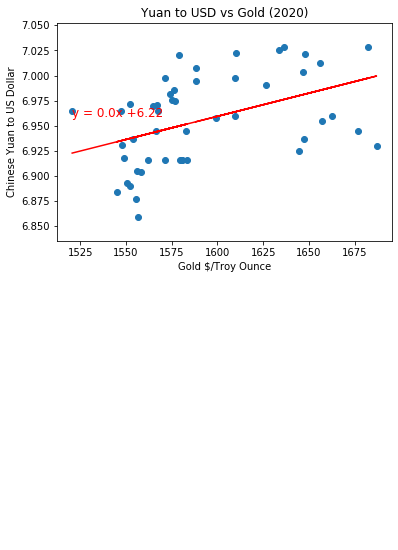

In [190]:
# Limit data frame by what we want to plot
df_04_2020_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_2020_prep['Date']=pd.to_datetime(df_04_2020_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2020-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2020_final = df_04_2020_prep[(df_04_2020_prep['Date']>=date1) & (df_04_2020_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_2020_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_2020_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold (2020)","Gold $/Troy Ounce","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +6.77
The r (Correlation) is: -0.12


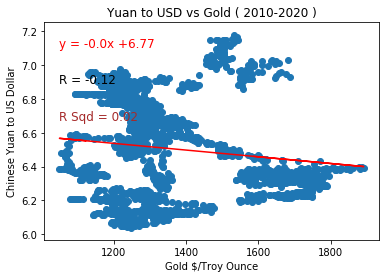

In [191]:
# Limit data frame by what we want to plot
df_04_ALL_prep = df[["Date","DEXCHUS","GOLDAMGBD228NLBM"]]

# Convert the Date column to the proper format
df_04_ALL_prep['Date']=pd.to_datetime(df_04_ALL_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_ALL_final = df_04_ALL_prep[(df_04_ALL_prep['Date']>=date1) & (df_04_ALL_prep['Date']<date2)]

# Identify the columns to be plotted
gold_df = df_04_ALL_final["GOLDAMGBD228NLBM"]
chyusd_df = df_04_ALL_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = gold_df

# pass the variables to the scatter function
cccscatter(x,y,"Yuan to USD vs Gold ( 2010-2020 )","Gold $/Troy Ounce","Chinese Yuan to US Dollar")


In [192]:
#==========================================================================================
# BONUS - - EXPERIMENTING WITH 6TH ORDER POLYNOMIAL FUNCTION 
# BRENT CRUDE VS DOW JONES INDUSTRIAL AVERAGE (WHERE DOW JONES IS BETWEEN 10,000 & 17,500)
# =========================================================================================

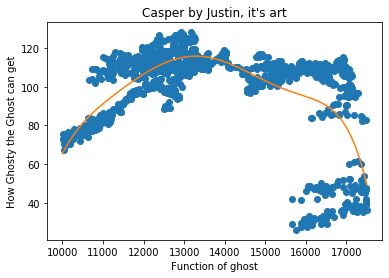

This is the art of creating something 
112.88049588145805


In [193]:
# Limit the data using date time
df4 = df[(df['DJIA']>=10000) & (df['DJIA']<17500)]

# Bring into each a single data frame
dji_df = df4["DJIA"]
brent_df = df4["DCOILBRENTEU"]

# Define x and y variables
y = brent_df
x = dji_df

# 6th Order Polynomial
y = brent_df.to_numpy()
x = dji_df.to_numpy()
curve =np.polyfit(x,y,6)
p = np.poly1d(curve)
xp = np.linspace(10000,17500,100)
plt.plot(x, y, 'o', label='data')
plt.plot(xp, p(xp), '-')
plt.title("Casper by Justin, it's art")
plt.xlabel("Function of ghost")
plt.ylabel("How Ghosty the Ghost can get")    


# Save an image of the figure
plt.savefig("Output/02_Analysis/BONUS_POLYNOMIAL_BrentCrude_vs_DowJones.png")

# Display the graph
plt.show()

# Print Comment 
print("This is the art of creating something ")

# Print the Y Axis value for X Axis = 14,000
print(p(14000))


In [194]:
#==========================================================================================
# BONUS - - EXPERIMENTING WITH 6TH ORDER POLYNOMIAL FUNCTION 
# GOLD VS DOW JONES INDUSTRIAL AVERAGE (WHERE DOW JONES IS BETWEEN 20,000 & 30,000)
# =========================================================================================

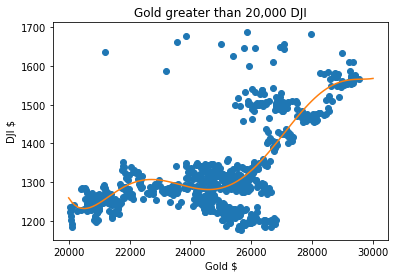

This is the art of creating something 
1330.0643318369985


In [195]:
# Limit the data using date time
df4 = df[(df['DJIA']>=20000) & (df['DJIA']<30000)]

# Bring into each a single data frame
dji_df = df4["DJIA"]
gold_df = df4["GOLDAMGBD228NLBM"]

# Define x and y variables
y = gold_df
x = dji_df

# 6th Order Polynomial
y = gold_df.to_numpy()
x = dji_df.to_numpy()
curve =np.polyfit(x,y,6)
p = np.poly1d(curve)
xp = np.linspace(20000,30000,100)
plt.plot(x, y, 'o', label='data')
plt.plot(xp, p(xp), '-')
plt.title("Gold greater than 20,000 DJI")
plt.xlabel("Gold $")
plt.ylabel("DJI $")    

# Save an image of the figure
plt.savefig("Output/02_Analysis/BONUS_POLYNOMIAL_Gold_vs_DowJones.png")

# Dispaly the Graph
plt.show()

# Print Comment
print("This is the art of creating something ")

# Print the Y Axis value for X Axis = 26,000
print(p(26000))

